In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline 
#last line allows us to see the plot in the jupyter notebook

In [2]:
N=50 # number of points
x_start=-2.0 #starting x boundary
x_end=2.0 #ending x boundary
y_start, y_end = -1.0, 1.0 #y boundary in different format
x=numpy.linspace(x_start, x_end, N)
y=numpy.linspace(y_start,y_end, N)

#print('x= ', x) #printing the x array
#print('y= ' + str(y)) #printing the y array in a different format
X, Y = numpy.meshgrid(x, y)

#print(X)
#print(Y)

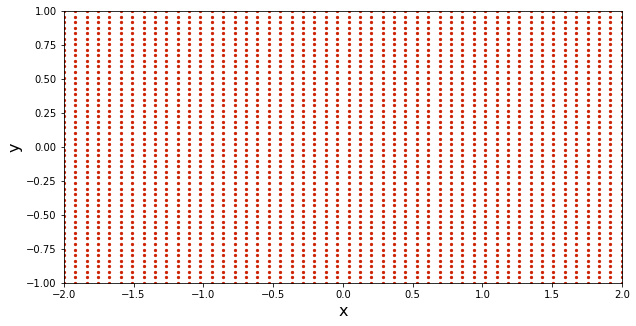

In [3]:
# plot the points!

width = 10.0
height=(y_end - y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width, height))
# we could have also given the figure an arbitrary 
# width and height like 10.0 and 10.0 as well
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X,Y, s=5, color="#CD2305", marker='o')

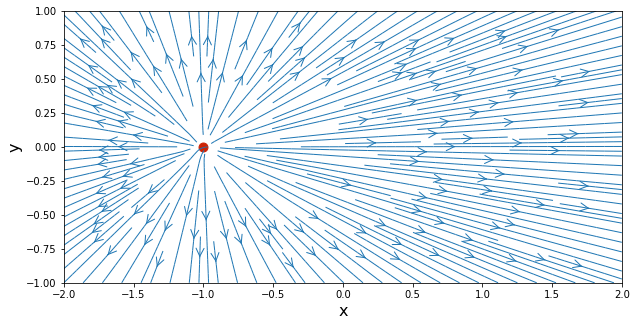

In [4]:
# source flow

strength_source=5.0
x_source, y_source=-1.0, 0.0 # position of the source on x,y coordinates

# compute the velocity feild on the mesh grid
u_source = (strength_source /(2*math.pi)*(X-x_source)/((X-x_source)**2+(Y-y_source)**2))
v_source = (strength_source /(2*math.pi)*(Y-y_source)/((X-x_source)**2+(Y-y_source)**2))


# plot the streamlines
width = 10.0
height=(y_end - y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width, height))
# we could have also given the figure an arbitrary 
# width and height like 10.0 and 10.0 as well
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X,Y,u_source,v_source, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o');
# use the ; after pyplot.scatter in order to suppress the weird "out[14]" line

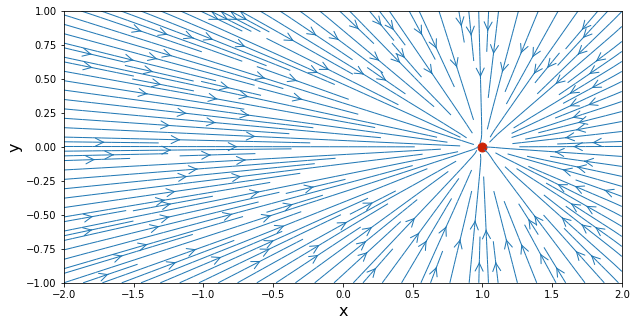

In [5]:
# the difference between a source and a sink is the 
# sign of the strength term
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0

u_sink = (strength_sink /(2*math.pi)*(X-x_sink)/((X-x_sink)**2+(Y-y_sink)**2))
v_sink = (strength_sink /(2*math.pi)*(Y-y_sink)/((X-x_sink)**2+(Y-y_sink)**2))

# plot the streamlines
width = 10.0
height=(y_end - y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width, height))
# we could have also given the figure an arbitrary 
# width and height like 10.0 and 10.0 as well
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X,Y,u_sink,v_sink, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink, color='#CD2305', s=80, marker='o');

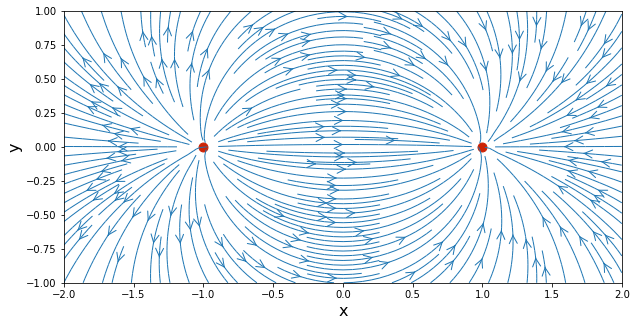

In [6]:
# use the superposition principle to see what happens when you put 
# a source and sink next to each other

u_pair = u_source + u_sink
v_pair = v_source + v_sink

# plot the streamlines of the source sink pair
width = 10.0
height=(y_end - y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width, height))
# we could have also given the figure an arbitrary 
# width and height like 10.0 and 10.0 as well
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X,Y,u_pair,v_pair, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o');


Challenge: What is the total mass flux outward of a small closed surface around the source?

Conservation of mass equ => use the integral along a surface

We know that this equation uses integral of mass flux x dS and that dS = r x d_theta <= this is the arc length eqn

Integrate from 0 to 2pi and plug in dS = r x d_theta to get the mass flux or "strength" of the source 

Challenge: write your own code for plotting the potential lines using contour()

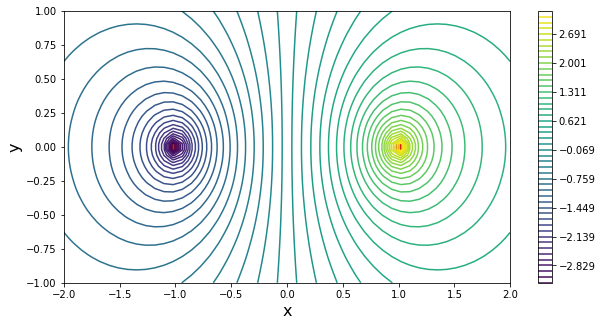

In [8]:
# the potential has the equation: phi=(strength/2pi)*r where r is the radial distance

# need to get the radial distance or the hypotenuse of each triangle
r_source=numpy.sqrt((X-x_source)**2+(Y-y_source)**2)
r_sink=numpy.sqrt((X-x_sink)**2+(Y-y_sink)**2)

#getting the potential lines phi
phi_source=(strength_source/(2*math.pi))*numpy.log(r_source)
phi_sink=(strength_sink/(2*math.pi))*numpy.log(r_sink)

phi_tot=phi_source+phi_sink

# plotting
width = 10.0
#height=(y_end - y_start)/(x_end-x_start)*width
height=5
pyplot.figure(figsize=(width, height))
# we could have also given the figure an arbitrary 
# width and height like 10.0 and 10.0 as well
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o');
cont=pyplot.contour(X,Y,phi_tot, levels=numpy.linspace(numpy.min(phi_tot), numpy.max(phi_tot), N))
# can also use:
#cont=pyplot.contour(X,Y,phi_tot, 51)
cbar = pyplot.colorbar(cont)
#print(height)